# Assignment 1 - Part B2: Working with you own data 

In this assignment you will create you own dataset for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. 

### Generating your dataset:

For this assignment you will create your own dataset of motions that you collect with an Accelerometer and Gyroscope. For this you can use your phone as a sensor.
To be able to collect your data you can best use an app called [phyphox](https://phyphox.org/), this is a free app available in app stores. This app can be configured to acces your sensordata, sample it as given frequency's. you can set it up te have experiment timeslots, and the data with a timestamp can be exported to a needed output format.

![](https://phyphox.org/wp-content/uploads/2019/06/phyphox_dark-1024x274.png)

When you installed the app you can setup a custum experiment by clicking on the + button. Define an experiment name, sample frequency and activate the Accelerometer and Gyroscope. Your custom experiment will be added, you can run it pressing the play button and you will see sensor motion. Pressing the tree dots (...) lets you define timed runs, remote access and exporting data.

### steps

With your own generated dataset the similar sequence of steps should be taken to train your model.

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions


---
In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.


### Hints

Additional info can be found in the tips and trick document

```
Felix Douven, Kasper walraven, Yosha op het Veld
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

```
The goal is to create a model which is based on the "Train" data that can correctly predict which activity a subject is undertaking. 
The Data will be analised, and checked for any errors such as missing data or duplicate data. Multiple algorithms will be tested and plotted to determine the most succesful Algorithm(s). This model consists of the most succesful algorithm(s) tested.
```


# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

> NOTE: You can download the dataset directly from github, see Tips & Tricks

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import os
import time
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mpl_toolkits import mplot3d
from pylab import rcParams
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import zipfile
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV

Here we will import all the libraries that are needed in the program

In [2]:
test = pd.read_csv("test.csv")
train= pd.read_csv("train.csv")
data = pd.concat([test, train])

print(data)
print(train)

       Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0         0.152                   -2.59                    4.11   
1         0.202                   -1.87                    4.41   
2         0.252                   -2.03                    3.78   
3         0.302                   -1.83                    3.82   
4         0.352                   -1.17                    2.31   
...         ...                     ...                     ...   
21091   105.000                    8.09                   -1.47   
21092   105.000                    8.08                   -1.46   
21093   105.000                    8.07                   -1.45   
21094       NaN                     NaN                     NaN   
21095       NaN                     NaN                     NaN   

       Acceleration z (m/s^2)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  \
0                        8.79            -0.525000            -0.393000   
1                        8.58            -0.6

```
Importing CSV files from same directory and printing them
```


# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

> NOTE:You can visualize high-dimensional data in 2-d using T-distributed Stochastic Neighbor Embedding, see Tips & Tricks. (You can also visualze it in 3D, as described in the tutorial)



In [3]:
print(f"Train Dataset Shape: {train.shape}")
print(f"Test Dataset Shape: {test.shape}")
print("-----------------------------------------")
print(f"Train Dataset Missing Data Counts: {train.isna().sum().sum()}")
print(f"Test Dataset Missing Data Counts: {test.isna().sum().sum()}")
print("-----------------------------------------")
print(f"Train Dataset Duplicate Data Counts: {train.duplicated().sum()}")
print(f"Test Dataset Duplicate Data Counts: {test.duplicated().sum()}")

Train Dataset Shape: (21096, 9)
Test Dataset Shape: (21285, 9)
-----------------------------------------
Train Dataset Missing Data Counts: 18
Test Dataset Missing Data Counts: 0
-----------------------------------------
Train Dataset Duplicate Data Counts: 1
Test Dataset Duplicate Data Counts: 0


```
Here you can see that we are missing 18 data. This are the last two rows of all the data. We will need to delete this before we can continue
```

In [4]:
print("DataFrame after removing NaN values...",train.dropna())
train = train.dropna()
data = pd.concat([test, train])

DataFrame after removing NaN values...        Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0         217.0                   -4.75                   -6.60   
1         217.0                   -7.49                   -7.82   
2         217.0                   -8.96                   -7.61   
3         217.0                   -7.71                   -7.38   
4         217.0                  -10.10                   -8.47   
...         ...                     ...                     ...   
21089     105.0                    8.08                   -1.46   
21090     105.0                    8.09                   -1.46   
21091     105.0                    8.09                   -1.47   
21092     105.0                    8.08                   -1.46   
21093     105.0                    8.07                   -1.45   

       Acceleration z (m/s^2)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  \
0                      -1.500             0.560000            -0.400000   
1     

```
In this printed data we dont see any missing data anymore.
```

In [5]:
print(f"Train Dataset Shape: {train.shape}")
print(f"Test Dataset Shape: {test.shape}")
print("-----------------------------------------")
print(f"Train Dataset Missing Data Counts: {train.isna().sum().sum()}")
print(f"Test Dataset Missing Data Counts: {test.isna().sum().sum()}")
print("-----------------------------------------")
print(f"Train Dataset Duplicate Data Counts: {train.duplicated().sum()}")
print(f"Test Dataset Duplicate Data Counts: {test.duplicated().sum()}")

Train Dataset Shape: (21094, 9)
Test Dataset Shape: (21285, 9)
-----------------------------------------
Train Dataset Missing Data Counts: 0
Test Dataset Missing Data Counts: 0
-----------------------------------------
Train Dataset Duplicate Data Counts: 0
Test Dataset Duplicate Data Counts: 0


```
This shows The shape of the data [columns, rows]

The "missing data counts" shows that no data is missing

The "duplicate data counts" shows that no data is the same
```

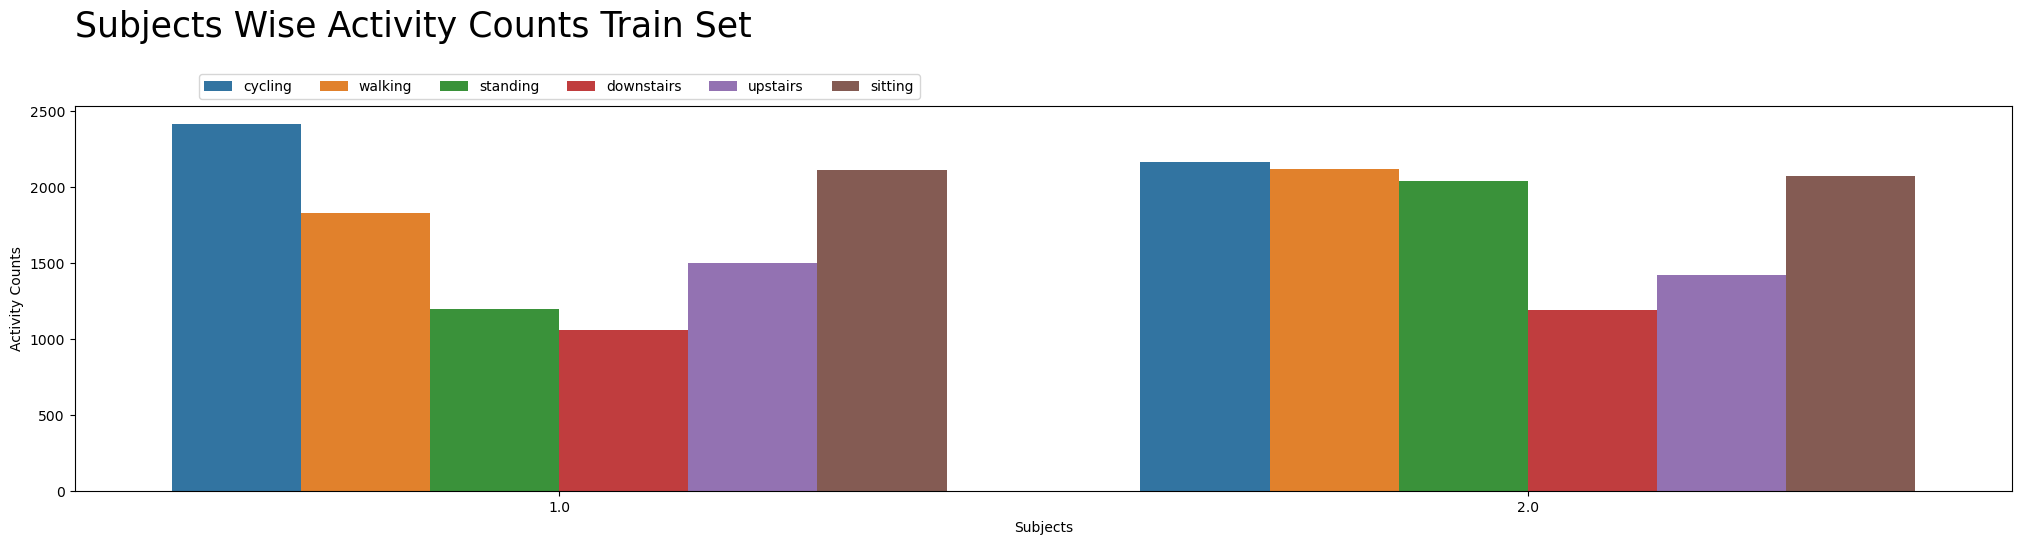

<Figure size 500x500 with 0 Axes>

In [6]:
plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=train, x='subject', hue='activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["cycling", "walking", "standing", "downstairs", "upstairs", "sitting"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts Train Set", fontsize=25, loc='left', pad=50)
plt.show()


plt.figure(figsize=(5, 5))
label_counts = train['activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Activity Counts Distribution Train Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

```
This plot shows how much data each activity contains. The amount of rows per activity equals to how much data is aquired for that activity.
```

D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21094 samples in 0.043s...
[t-SNE] Computed neighbors for 21094 samples in 0.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21094
[t-SNE] Computed conditional probabilities for sample 2000 / 21094
[t-SNE] Computed conditional probabilities for sample 3000 / 21094
[t-SNE] Computed conditional probabilities for sample 4000 / 21094
[t-SNE] Computed conditional probabilities for sample 5000 / 21094
[t-SNE] Computed conditional probabilities for sample 6000 / 21094
[t-SNE] Computed conditional probabilities for sample 7000 / 21094
[t-SNE] Computed conditional probabilities for sample 8000 / 21094
[t-SNE] Computed conditional probabilities for sample 9000 / 21094
[t-SNE] Computed conditional probabilities for sample 10000 / 21094
[t-SNE] Computed conditional probabilities for sample 11000 / 21094
[t-SNE] Computed conditional probabilities for sample 12000 / 21094
[t-SNE] Computed conditional probabilities for sa

<AxesSubplot:>

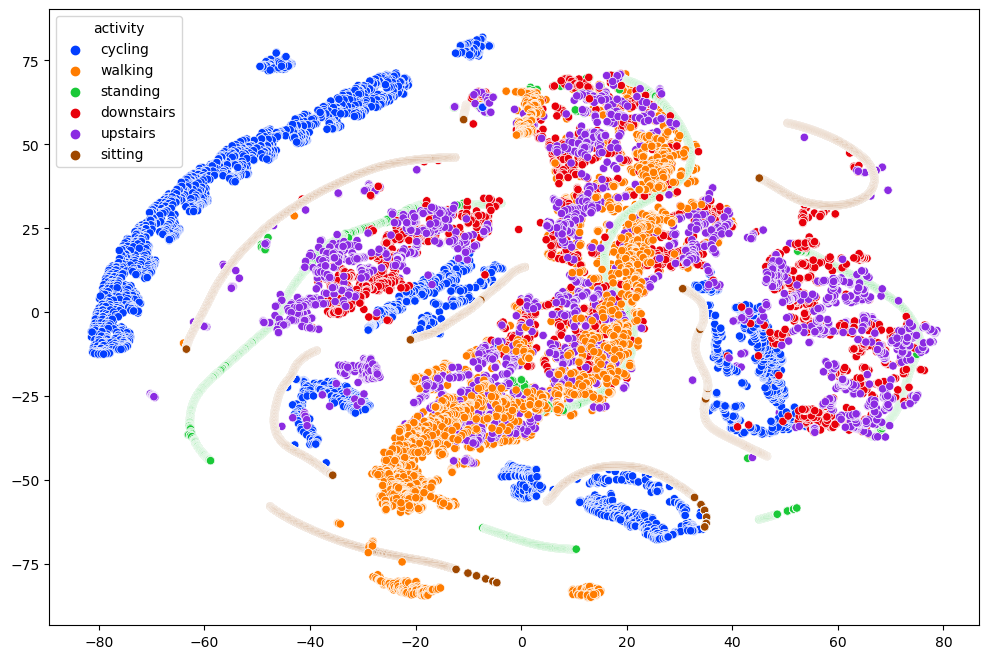

In [7]:
x_for_tsne = train.drop(['subject', 'activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["activity"],palette="bright")

```
In a scatterplot groups are easily identifiable except for upstairs and downstairs. there are no really clear areas for every avtivity but each activity does have some kind of line. So it should be possible to use the data.
```

In [8]:
x_for_tsne = train.drop(['subject', 'activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=3, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)

fig = px.scatter_3d(
    x =tsne[:, 0],
    y = tsne[:, 1],
    z = tsne[:, 2],
    color=train['activity']
)
fig.update_layout(
    title="Cluster Of Activities",
    title_font=dict(size=25, color='#a5a7ab'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.show()


D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21094 samples in 0.033s...
[t-SNE] Computed neighbors for 21094 samples in 0.922s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21094
[t-SNE] Computed conditional probabilities for sample 2000 / 21094
[t-SNE] Computed conditional probabilities for sample 3000 / 21094
[t-SNE] Computed conditional probabilities for sample 4000 / 21094
[t-SNE] Computed conditional probabilities for sample 5000 / 21094
[t-SNE] Computed conditional probabilities for sample 6000 / 21094
[t-SNE] Computed conditional probabilities for sample 7000 / 21094
[t-SNE] Computed conditional probabilities for sample 8000 / 21094
[t-SNE] Computed conditional probabilities for sample 9000 / 21094
[t-SNE] Computed conditional probabilities for sample 10000 / 21094
[t-SNE] Computed conditional probabilities for sample 11000 / 21094
[t-SNE] Computed conditional probabilities for sample 12000 / 21094
[t-SNE] Computed conditional probabilities for sa

```
3d Scatterplot in xyz 
```

```
The scatterplot can properly define which subject did which activity with the use of clusters.
```

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.


In [9]:
test_data=pd.read_csv("test.csv", usecols=range(0,7))
train_data=pd.read_csv("train.csv", usecols=range(0,7))
data_data = pd.concat([test_data, train_data])

X = data_data
X = X.dropna()
print(X)
Y = data.activity
Y = Y.dropna()
print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None, shuffle = True)

print("There are sampels and dimensions for the features", X.shape)
print("There are sampels and dimensions for the Targets", Y.shape)

print("Training Data input")
print(X_train)
print("")
print("Training Activity Data")
print(y_train)
print("")
print("Testing Data input")
print(X_test)
print("")
print("Testing Activity Data")
print(y_test)


       Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0         0.152                   -2.59                    4.11   
1         0.202                   -1.87                    4.41   
2         0.252                   -2.03                    3.78   
3         0.302                   -1.83                    3.82   
4         0.352                   -1.17                    2.31   
...         ...                     ...                     ...   
21089   105.000                    8.08                   -1.46   
21090   105.000                    8.09                   -1.46   
21091   105.000                    8.09                   -1.47   
21092   105.000                    8.08                   -1.46   
21093   105.000                    8.07                   -1.45   

       Acceleration z (m/s^2)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  \
0                        8.79            -0.525000            -0.393000   
1                        8.58            -0.6

```
Data is getting shuffled meaning the rows are getting randomized. Splitting data in data inputs and data outputs (activity) which is used for learning. 2 of the 3 subjects are used to train the algorithms and the rest is used to test the algorithm.
```

# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

start algo


D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



knn
pol
rbf
dtc
etc
rfc
gnb
qda
KNN Not normalized confusion matrix
[[2250    7    7   17    2    9]
 [  33  396    4   36   59   80]
 [   1    0 2218    0    0    0]
 [   5    2    0 1398    3    9]
 [  12   72    8   34  569   72]
 [  44   66    2   74   38  949]]
Poly Not normalized confusion matrix
[[1243    0  997   52    0    0]
 [   0    0  608    0    0    0]
 [  10    0 2209    0    0    0]
 [   0    0 1197  220    0    0]
 [   0    0  767    0    0    0]
 [   0    0 1173    0    0    0]]
Rbf Not normalized confusion matrix
[[2020    2  167  102    0    1]
 [ 130   65   49  191    6  167]
 [   8    3 1875   13    0  320]
 [   3    1   10 1158    0  245]
 [  73   56   70  175  165  228]
 [ 114    2  116  352    0  589]]
DecisionTree Not normalized confusion matrix
[[2203   28    7    7   12   35]
 [  36  347    1    9  121   94]
 [   2    2 2212    0    1    2]
 [  14    8    0 1370   12   13]
 [  13  115    3   10  551   75]
 [  27   72    0   15   75  984]]
ExtraTrees Not nor

D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



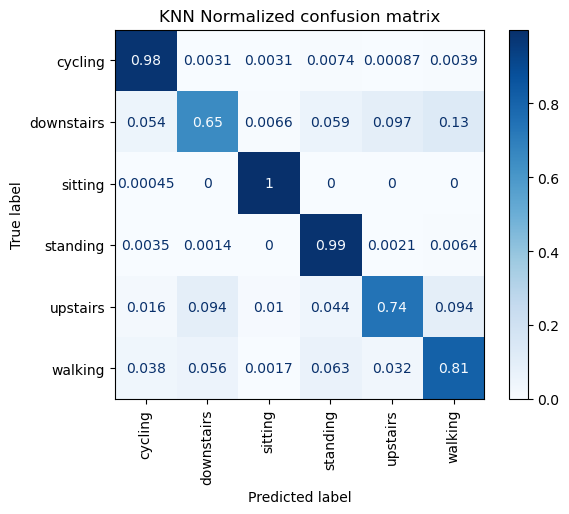

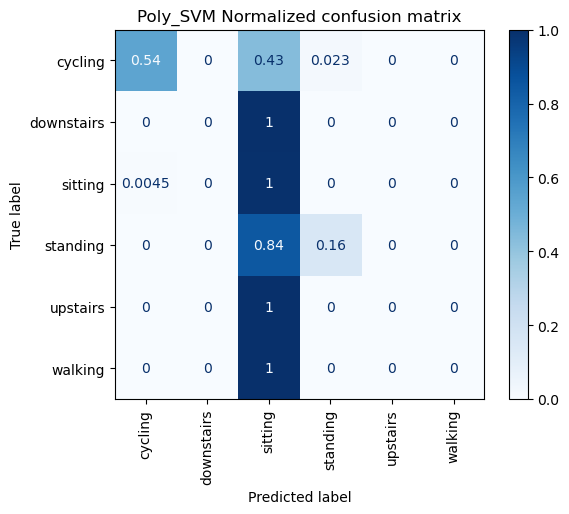

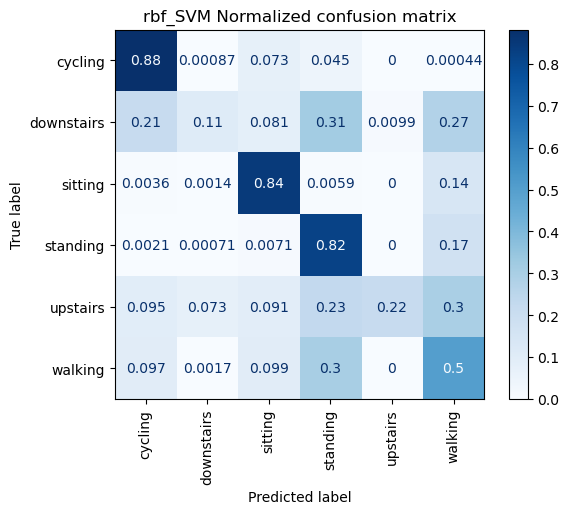

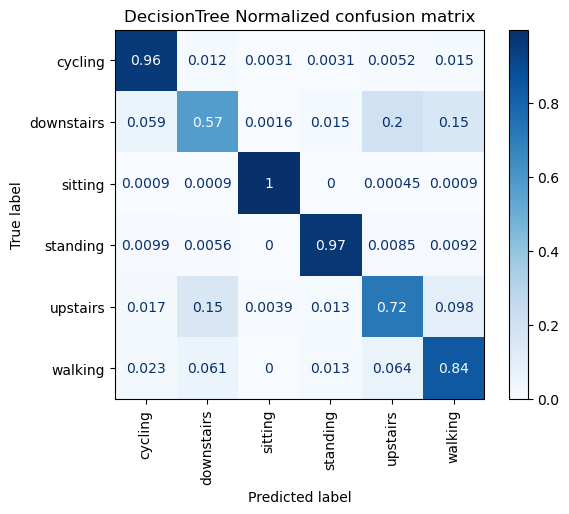

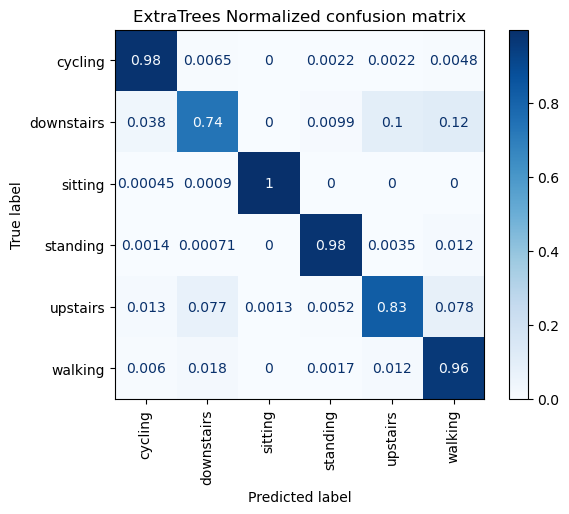

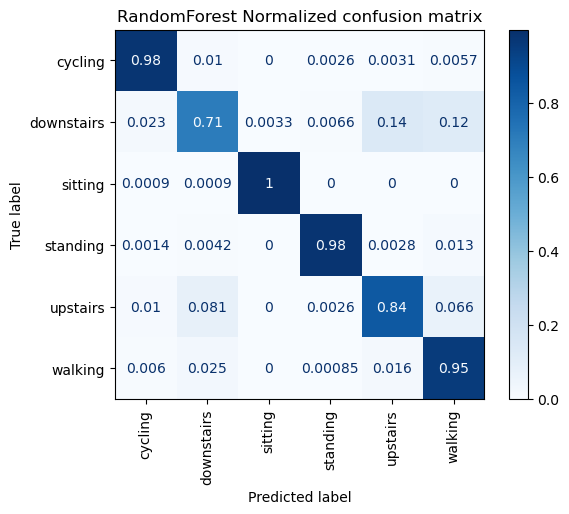

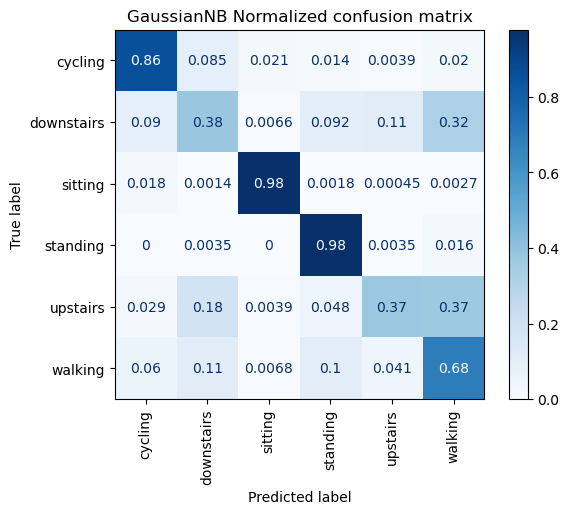

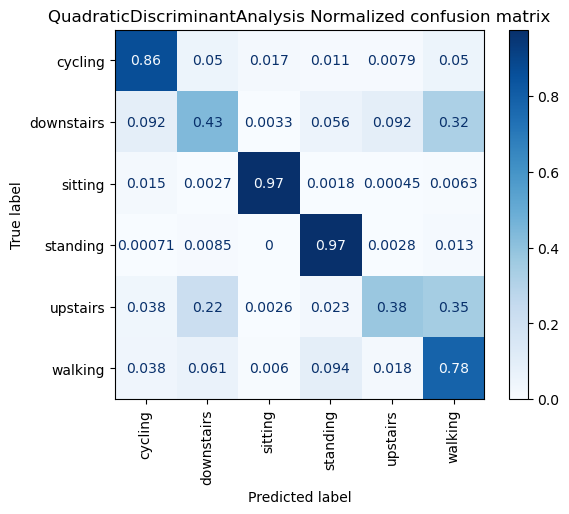

knn accuracy : 91.79 %
pol accuracy : 43.32 %
rbf accuracy : 69.28 %
dtc accuracy : 90.46 %
etc accuracy : 95.26 %
rfc accuracy : 94.79 %
gnb accuracy : 80.59 %
qda accuracy : 82.48 %


In [10]:
#algorithm functions
print("start algo")
#---------------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("knn")
#---------------------------------------------------------------------------
svclassifier_pol = SVC(kernel='poly', degree=8)
svclassifier_pol.fit(X_train, y_train)
y_pred_pol = svclassifier_pol.predict(X_test)
print("pol")
#---------------------------------------------------------------------------
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(X_train, y_train)
y_pred_rbf = svclassifier_rbf.predict(X_test)
print("rbf")
#---------------------------------------------------------------------------
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("dtc")
#---------------------------------------------------------------------------
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)
print("etc")
#---------------------------------------------------------------------------
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("rfc")
#---------------------------------------------------------------------------
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("gnb")
#---------------------------------------------------------------------------
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print("qda")

#plotting non normalized confusion matrices
print("KNN Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_knn))
print("Poly Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_pol))
print("Rbf Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_rbf))
print("DecisionTree Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_dtc))
print("ExtraTrees Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_etc))
print("RandomForest Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_rfc))
print("GaussianNB Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_gnb))
print("QuadraticDiscriminantAnalysis Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_qda))



#lists of algorithms
class_names = data.activity
titles_options = [
    ("KNN Normalized confusion matrix", "true"),
    ("Poly_SVM Normalized confusion matrix", "true"),
    ("rbf_SVM Normalized confusion matrix", "true"),
    ("DecisionTree Normalized confusion matrix", "true"),
    ("ExtraTrees Normalized confusion matrix", "true"),
    ("RandomForest Normalized confusion matrix", "true"),
    ("GaussianNB Normalized confusion matrix", "true"),
    ("QuadraticDiscriminantAnalysis Normalized confusion matrix", "true")
]

algo_names = [
    knn,
    svclassifier_pol,
    svclassifier_rbf,
    dtc,
    etc,
    rfc,
    gnb,
    qda
]


title_names = [
    "knn",
    "pol",
    "rbf",
    "dtc",
    "etc",
    "rfc",
    "gnb",
    "qda"
    
]

pred_names = [
    y_pred_knn,
    y_pred_pol,
    y_pred_rbf,
    y_pred_dtc,
    y_pred_etc,
    y_pred_rfc,
    y_pred_gnb,
    y_pred_qda
]

#plotting normalized matrices
i = 0
for title, normalize in titles_options: 
    disp = ConfusionMatrixDisplay.from_estimator(algo_names[i], X_test, y_test, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation="vertical")
    disp.ax_.set_title(title)
    i = i + 1
plt.show()

#printing and calculting accuracy
i = 0
for title in title_names:
    print(title,"accuracy :", round(sklearn.metrics.accuracy_score(y_test, pred_names[i])*100, 2),"%")
    i = i + 1


```
Knn with k is 5. The subject with the highest correlation are eliminated. the perfect model should have a score of 1 when all predictions are correct.


here we can see what algorithms preform the best with our data. 
The best three we have chosen to build into our model. 
This are the: 
Knn algorithm 
Etc algorithm
Rfc algorithm 

```

# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X,Y, stratify=Y, test_size=0.2, random_state=42)

knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_lin = knn.predict(X_test)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn_train_accuracy = accuracy_score(y_train, y_train_pred) 
 

# Test set performance
knn_test_accuracy = accuracy_score(y_test,y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(knn_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(knn_test_accuracy*100,2), "%")

D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Model performance for Training set
- Accuracy: 94.83 %
----------------------------------
Model performance for Test set
- Accuracy: 91.84 %


D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



```
The knn algorithm was trained and was tested with an accuracy of 91.84%
```

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, stratify=Y, test_size=0.2, random_state=42
)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_pol = rfc.predict(X_test)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

rfc_train_accuracy = accuracy_score(y_train, y_train_pred) 
 

# Test set performance
rfc_test_accuracy = accuracy_score(y_test,y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(rfc_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(rfc_test_accuracy*100,2), "%")

Model performance for Training set
- Accuracy: 100.0 %
----------------------------------
Model performance for Test set
- Accuracy: 94.84 %


```
The Rfc algorithm was trained and was tested with an accuracy of 94.84%
```

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, stratify=Y, test_size=0.2, random_state=42
)

etc = ExtraTreesClassifier(n_estimators=500, min_samples_split=3, max_depth=500)
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

etc_train_accuracy = accuracy_score(y_train, y_train_pred) 
 

# Test set performance
etc_test_accuracy = accuracy_score(y_test,y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(etc_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(etc_test_accuracy*100,2), "%")


Model performance for Training set
- Accuracy: 100.0 %
----------------------------------
Model performance for Test set
- Accuracy: 95.38 %


```
The Etc algorithm was trained and was tested with an accuracy of 95.38%
```

In [14]:
estimator_list = [
    ('knn',knn),
    ('rfc',rfc),
    ('etc',etc) ]
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
stack_model.fit(X_train, y_train)
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)


stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(stack_model_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(stack_model_test_accuracy*100,2), "%")


D:\programs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model performance for Training set
- Accuracy: 100.0 %
----------------------------------
Model performance for Test set
- Accuracy: 95.85 %


```
Here we build a model from our three algorithms. We combined the and made one model. THis model has an accuracy of 95,75%. This is better than the best single algorithm and proves that the model is a good solution for the algorithms. 
```

# 7. Present your solution.

Explain why you would choose for a specific model



```
Total code of the assignment is shown above
```


# 8. Launch, monitor, and maintain your system.

Can you Deployment the model?

> NOTE: The app provides the option for remote access, so you are able to get live sensordata from the phone

# 9. Additional Questions

1. Explain the chosen motions you chose to be classified.

2. Which of these motions is easier/harder to classify and why?

3. After your experience, which extra sensor data might help getting a better classifier and why?

4. Explain why you think that your chosen algorithm outperforms the rest?

5. While recording the same motions with the same sensor data, what do you think will help improving the performance of your models? 


1. these particular motions are based on our dayly activities wich means it is easy to gather a lot of data 
2. by looking at the graph in part 3 we can conclude that both walking upstais and downstairs are very hard to tell apart.
3. some way of measuring the altidude accurately can be used to dertermine if the person is walking upstairs or downstairs.
4. in part 5 there are 8 diffrent algorythms tested. by looking at the results we determined the 3 best ones. these were later combined into 1 model with a high accuracy.
5. the more data is accuired, the more accurate the model will become. it will also help if the same motions are recorded on diffrent people to have more variety in the data.